In [1]:
from sklearn.model_selection import train_test_split
# ^^^ pyforest auto-imports - don't write above this line
df=pd.read_csv(r'D:\Data Science\My Projects\train_2v.csv')

In [ ]:
## In the train data set we have 43400 rows and 12 columns
df=df.drop(columns='id')
df

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
## BMI and smoking_status having null values


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [7]:
## From above table we can analysis there are some outliers present in the avg_glucose_level and bmi


In [8]:
df.isnull().sum()[df.isnull().sum()!=0][1]/df.shape[0]*100
## 30% null value present in smoking_status feature

30.62672811059908

In [9]:
df.isnull().sum()[df.isnull().sum()!=0][0]/df.shape[0]*100
## 3% null value present in the bmi feature

3.3686635944700463

## Univariate Analysis

In [10]:
## lets check the data is balance or imbalnce
df['stroke'].value_counts(1)

0    0.981959
1    0.018041
Name: stroke, dtype: float64

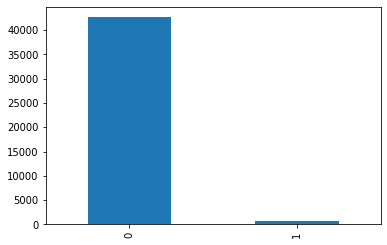

In [11]:
df['stroke'].value_counts().plot(kind='bar')

In [12]:
### Data is highly imbalance it is bias towards the 0-NO Stroke

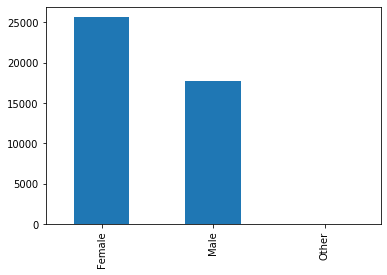

In [13]:
df['gender'].value_counts().plot(kind='bar')

In [14]:
df['gender'].nunique()
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

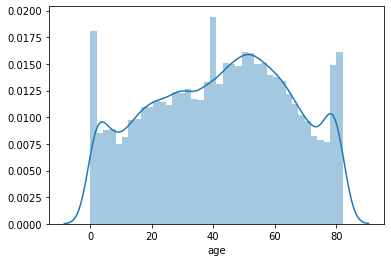

In [15]:
sns.distplot(df['age'])

In [16]:
## from above chart we can say that age distribution is not normal.It is slightly right skewed.
## Also there are high number of people comes under 0 age,40 age,70-85 age categorie.

0    39339
1     4061
Name: hypertension, dtype: int64

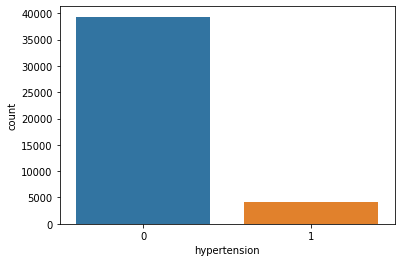

In [17]:
sns.countplot(df['hypertension'])
df['hypertension'].value_counts()

In [18]:
## There less number of people who are having hypertension

heart_disease:-
 0    41338
1     2062
Name: heart_disease, dtype: int64


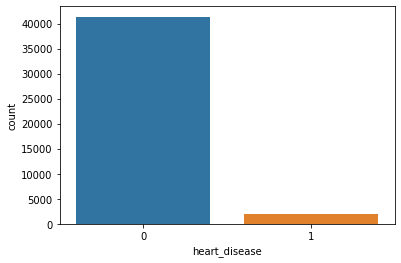

In [19]:
sns.countplot(df['heart_disease'])
print('heart_disease:-\n',df['heart_disease'].value_counts())



In [20]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


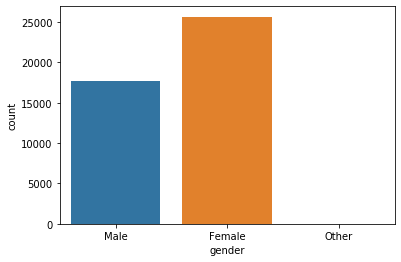

Yes    27938
No     15462
Name: ever_married, dtype: int64


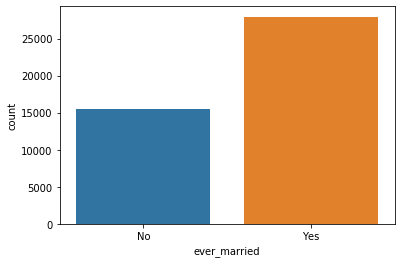

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


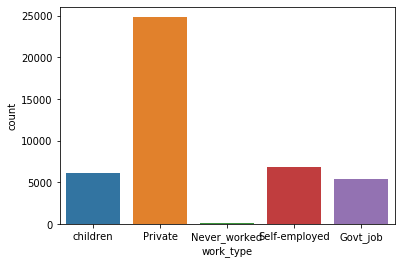

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64


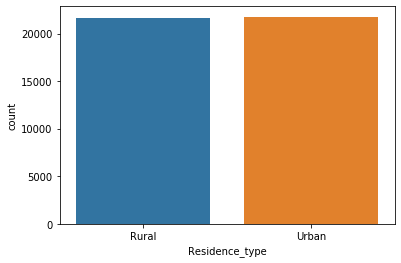

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


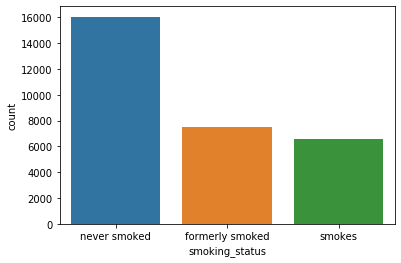

In [21]:
for i in object_cols:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [22]:
n = (df.dtypes != 'object')
numerical_cols = list(n[n].index)

print("Numerical variables:")
print(numerical_cols)

Numerical variables:
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


id


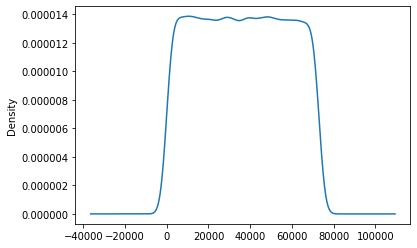

age


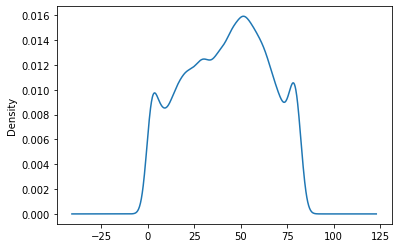

hypertension


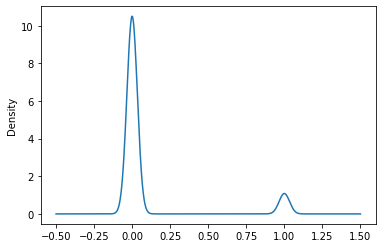

heart_disease


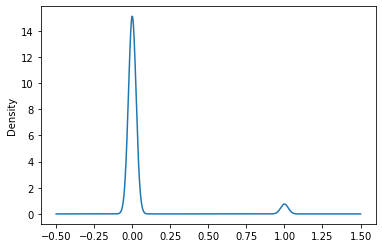

avg_glucose_level


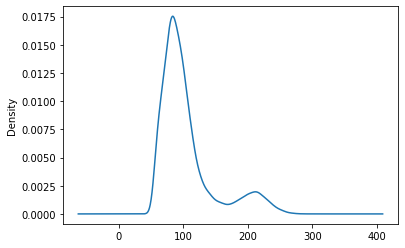

bmi


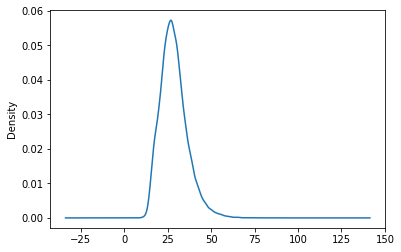

stroke


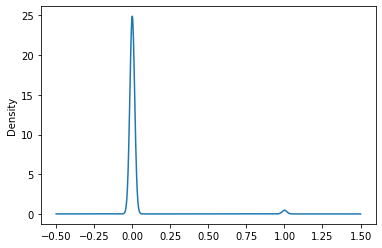

In [23]:
for i in numerical_cols:
    df[i].plot(kind='density')
    print(i)
    plt.show()

In [24]:
for i in numerical_cols:
    print('skewness of',i,'=',df[i].skew())
  

skewness of id = 0.004915715855254959
skewness of age = -0.10249737146133675
skewness of hypertension = 2.7911990830328466
skewness of heart_disease = 4.254251895211503
skewness of avg_glucose_level = 1.6754049014377763
skewness of bmi = 0.8987282500249906
skewness of stroke = 7.242226185479061


In [25]:
## there are some feature which are skewed like bmi and avg_glucose-level

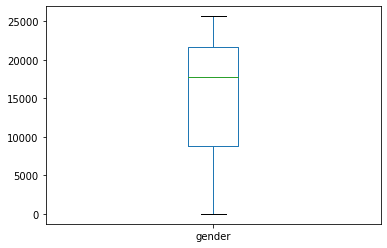

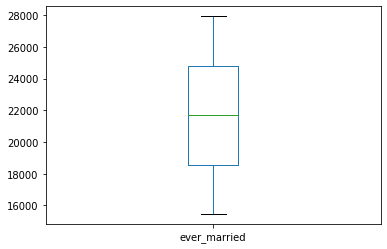

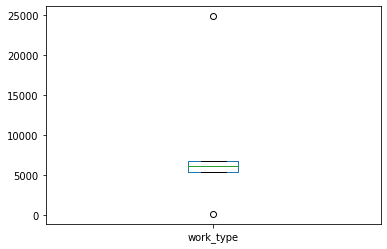

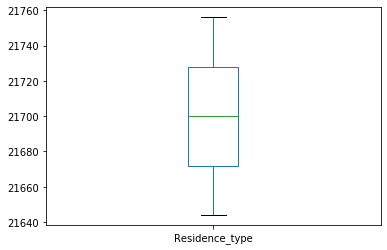

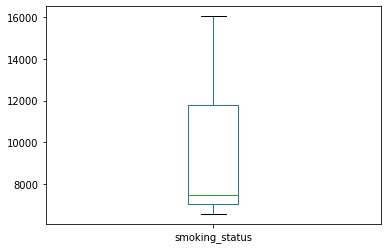

In [26]:
for i in object_cols:
    df[i].value_counts().plot(kind='box')
    plt.show()

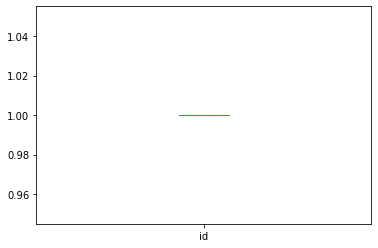

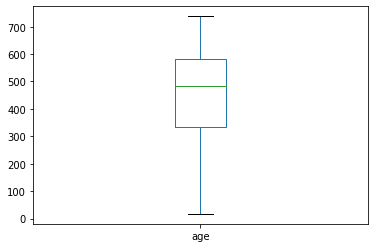

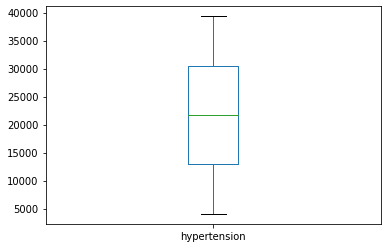

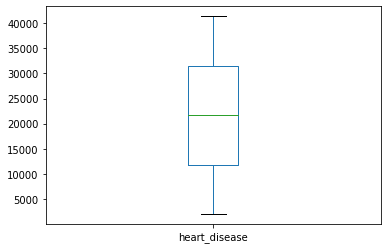

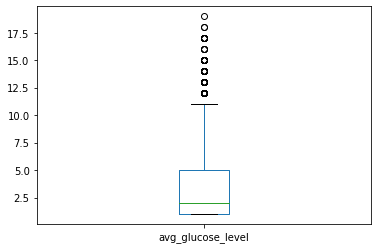

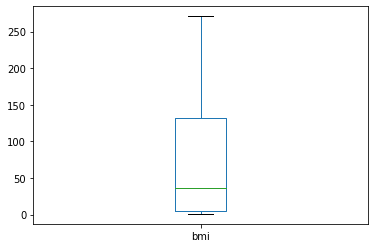

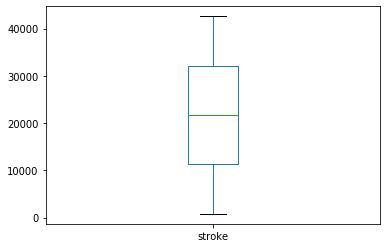

In [27]:
for i in numerical_cols:
    df[i].value_counts().plot(kind='box')
    plt.show()

In [28]:
## Inside the avg_glucose_level we can see that there are some outliers present.
## As avg_glucose_level is skwed lets try to transform this data so that we might reduce the outliers


## Bivariate Analysis

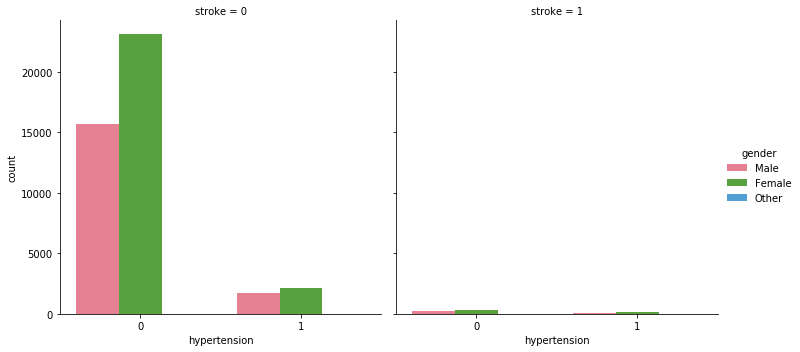

In [29]:
sns.catplot(x='hypertension',kind='count',col='stroke',hue='gender',data=df,palette="husl")

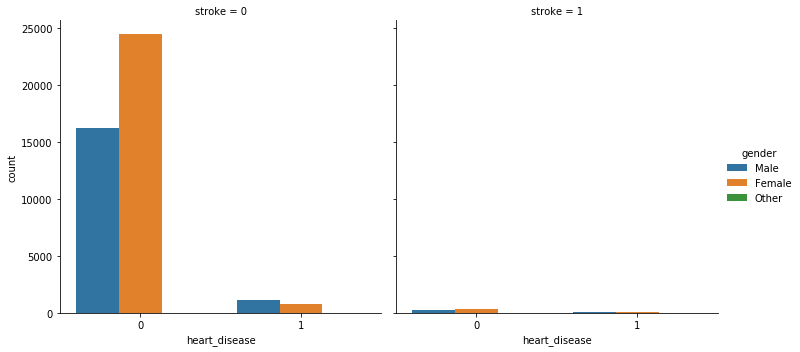

In [30]:
sns.catplot(x='heart_disease',kind='count',col='stroke',hue='gender',data=df)

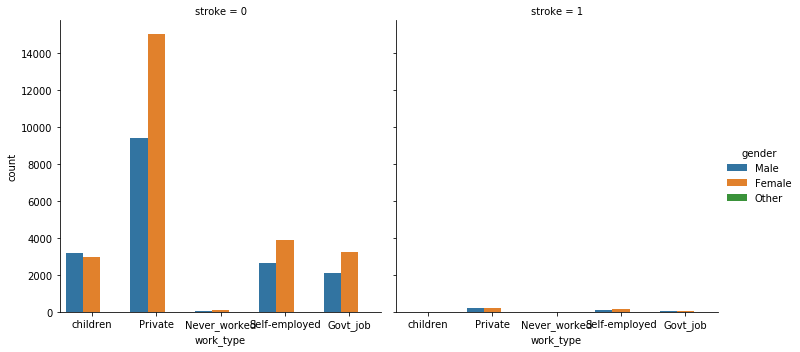

In [31]:
sns.catplot(x='work_type',kind='count',col='stroke',hue='gender',data=df)

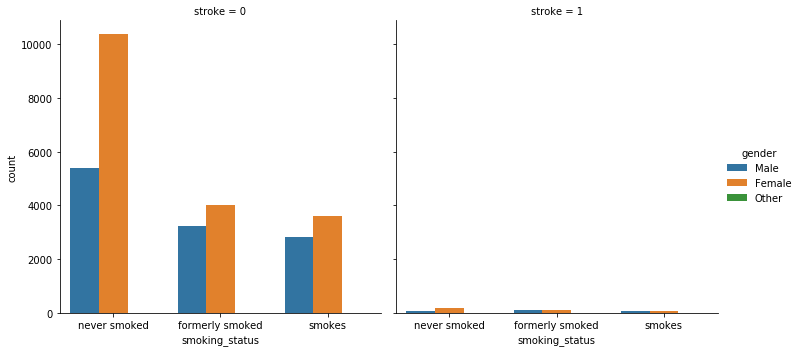

In [32]:
sns.catplot(x='smoking_status',kind='count',col='stroke',hue='gender',data=df)

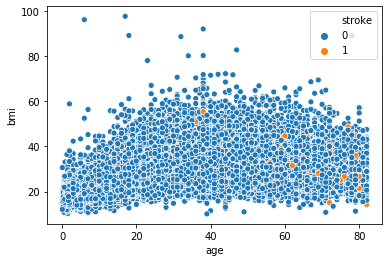

In [33]:
sns.scatterplot(df['age'],df['bmi'],hue=df['stroke'])

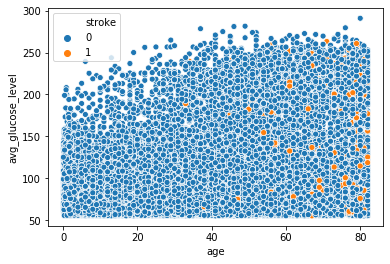

In [34]:
sns.scatterplot(df['age'],df['avg_glucose_level'],hue=df['stroke'])

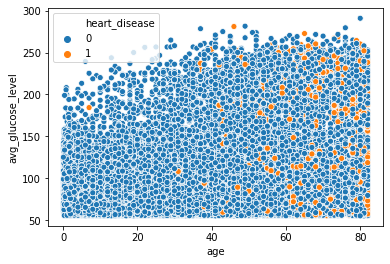

In [35]:

sns.scatterplot(df['age'],df['avg_glucose_level'],hue=df['heart_disease'])

In [36]:
## Lets fill the ban value in the bmi bcz only 3% of values are presaent in the dataset so we can fill this with mean

In [37]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [38]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [39]:
## In the smoking_status we are having 30% of na value which can not be treated asa the mode or something alse so lets distribute the data into two
## data frame one with not null and other with isnull


In [40]:
train_df=df.copy()

In [41]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
train_df['gender']=le.fit_transform(train_df['gender'])
train_df['ever_married'] = le.fit_transform(train_df['ever_married'])
train_df['Residence_type']= le.fit_transform(train_df['Residence_type'])



In [43]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,children,0,95.12,18.0,NaN,0
1,30468,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0
2,16523,0,8.0,0,0,0,Private,1,110.89,17.6,NaN,0
3,56543,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0
4,46136,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,children,1,58.64,20.4,never smoked,0
43396,5450,0,56.0,0,0,1,Govt_job,1,213.61,55.4,formerly smoked,0
43397,28375,0,82.0,1,0,1,Private,1,91.94,28.9,formerly smoked,0
43398,27973,1,40.0,0,0,1,Private,1,99.16,33.2,never smoked,0


In [44]:
onehot_encoded =pd.DataFrame(pd.get_dummies(df['work_type'],drop_first=True))
onehot_encoded

,Never_worked,Private,Self-employed,children
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
43395,0,0,0,1
43396,0,0,0,0
43397,0,1,0,0
43398,0,1,0,0


In [45]:
train_new=pd.concat([train_df,onehot_encoded],axis=1)

In [46]:
train_new

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children
0,30669,1,3.0,0,0,0,children,0,95.12,18.0,NaN,0,0,0,0,1
1,30468,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0,1,0,0
2,16523,0,8.0,0,0,0,Private,1,110.89,17.6,NaN,0,0,1,0,0
3,56543,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0,1,0,0
4,46136,1,14.0,0,0,0,Never_worked,0,161.28,19.1,NaN,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,children,1,58.64,20.4,never smoked,0,0,0,0,1
43396,5450,0,56.0,0,0,1,Govt_job,1,213.61,55.4,formerly smoked,0,0,0,0,0
43397,28375,0,82.0,1,0,1,Private,1,91.94,28.9,formerly smoked,0,0,1,0,0
43398,27973,1,40.0,0,0,1,Private,1,99.16,33.2,never smoked,0,0,1,0,0


In [47]:
train_new=train_new.drop(columns='work_type')

In [48]:
train_new

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children
0,30669,1,3.0,0,0,0,0,95.12,18.0,NaN,0,0,0,0,1
1,30468,1,58.0,1,0,1,1,87.96,39.2,never smoked,0,0,1,0,0
2,16523,0,8.0,0,0,0,1,110.89,17.6,NaN,0,0,1,0,0
3,56543,0,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,0,1,0,0
4,46136,1,14.0,0,0,0,0,161.28,19.1,NaN,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,1,58.64,20.4,never smoked,0,0,0,0,1
43396,5450,0,56.0,0,0,1,1,213.61,55.4,formerly smoked,0,0,0,0,0
43397,28375,0,82.0,1,0,1,1,91.94,28.9,formerly smoked,0,0,1,0,0
43398,27973,1,40.0,0,0,1,1,99.16,33.2,never smoked,0,0,1,0,0


In [49]:
train_df_without_smoke = train_new[train_df['smoking_status'].isnull()]
train_df_with_smoke = train_new[train_df['smoking_status'].notnull()]

In [50]:
train_df_without_smoke.drop(columns='smoking_status',axis=1,inplace=True)

C:\Users\BramboArmy\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
train_df_without_smoke

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children
0,30669,1,3.0,0,0,0,0,95.12,18.0,0,0,0,0,1
2,16523,0,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0
4,46136,1,14.0,0,0,0,0,161.28,19.1,0,1,0,0,0
5,32257,0,47.0,0,0,1,1,210.95,50.1,0,0,1,0,0
10,10460,0,79.0,0,0,1,1,77.08,35.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,0,9.0,0,0,0,1,68.49,16.8,0,0,0,0,1
43385,5366,0,66.0,0,0,1,1,92.10,24.8,0,0,0,1,0
43389,30759,1,14.0,0,0,0,1,82.48,24.8,0,0,0,0,1
43391,30077,1,6.0,0,0,0,1,77.48,19.1,0,0,0,0,1


In [52]:
train_df_with_smoke['smoking_status']= le.fit_transform(train_df_with_smoke['smoking_status'])

C:\Users\BramboArmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
train_df_with_smoke

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Never_worked,Private,Self-employed,children
1,30468,1,58.0,1,0,1,1,87.96,39.2,1,0,0,1,0,0
3,56543,0,70.0,0,0,1,0,69.04,35.9,0,0,0,1,0,0
6,52800,0,52.0,0,0,1,1,77.59,17.7,0,0,0,1,0,0
7,41413,0,75.0,0,1,1,0,243.53,27.0,1,0,0,0,1,0
8,15266,0,32.0,0,0,1,0,77.67,32.3,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,1,58.64,20.4,1,0,0,0,0,1
43396,5450,0,56.0,0,0,1,1,213.61,55.4,0,0,0,0,0,0
43397,28375,0,82.0,1,0,1,1,91.94,28.9,0,0,0,1,0,0
43398,27973,1,40.0,0,0,1,1,99.16,33.2,1,0,0,1,0,0


In [58]:
from imblearn.over_sampling import SMOTE

In [55]:
sm=SMOTE()

In [59]:
X_rs_with_smoke,y_rs_with_smoke=sm.fit_resample(train_df_with_smoke.loc[:,train_df_with_smoke.columns!='stroke'], 
                                            train_df_with_smoke['stroke'])

C:\Users\BramboArmy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
X_rs_with_smoke.shape,y_rs_with_smoke.shape

((58940, 14), (58940,))

In [61]:
X_rs_without_smoke,y_rs_without_smoke = sm.fit_resample(train_df_without_smoke.loc[:,train_df_without_smoke.columns!='stroke'], 
                                            train_df_without_smoke['stroke'])

C:\Users\BramboArmy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [62]:
X_rs_without_smoke.shape,y_rs_without_smoke.shape

((26294, 13), (26294,))

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_rs_with_smoke,y_rs_with_smoke,test_size=0.2,random_state=3)
print(X_train.shape)
print(X_test.shape)

<IPython.core.display.Javascript object>

(47152, 14)
(11788, 14)


In [66]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_rs_without_smoke,y_rs_without_smoke,test_size=0.2,random_state=3)
print(X_train_1.shape)
print(X_test_1.shape)

<IPython.core.display.Javascript object>

(21035, 13)
(5259, 13)


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
#.Libraries:-
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import imblearn
import lightgbm
#2. Code:-
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
 
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import imblearn
import lightgbm
 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
#for graphviz
import os
    
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"



Confusion Matrix - Train :  
 [[23567     0]
 [    0 23585]]
Accuracy Score - Train :  1.0
Classification Report - Train :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23567
           1       1.00      1.00      1.00     23585

    accuracy                           1.00     47152
   macro avg       1.00      1.00      1.00     47152
weighted avg       1.00      1.00      1.00     47152

AUC Score - Train :  1.0



Confusion Matrix - Test :  [[5737  166]
 [ 143 5742]]
Accuracy Score - Test :  0.9737869019341704
Classification Report - Test :                precision    recall  f1-score   support

           0       0.98      0.97      0.97      5903
           1       0.97      0.98      0.97      5885

    accuracy                           0.97     11788
   macro avg       0.97      0.97      0.97     11788
weighted avg       0.97      0.97      0.97     11788

AUC Score - Test :  0.973789820161141




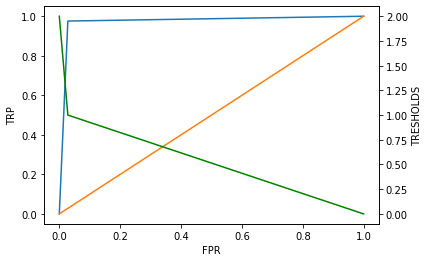

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

dtc=DecisionTreeClassifier(random_state=3)
dtc.fit(X_train,y_train)
y_train_pred=dtc.predict(X_train)
y_train_prob=dtc.predict_proba(X_train)[:,1]
y_test_pred=dtc.predict(X_test)
y_test_prob=dtc.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train : ','\n', confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train : ',accuracy_score(y_train,y_train_pred))
print('Classification Report - Train : ',classification_report(y_train,y_train_pred))
print('AUC Score - Train : ', roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix - Test : ', confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test : ',accuracy_score(y_test,y_test_pred))
print('Classification Report - Test : ',classification_report(y_test,y_test_pred))
print('AUC Score - Test : ', roc_auc_score(y_test,y_test_prob))
print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

Confusion Matrix - Train :  
 [[10493     0]
 [    0 10542]]
Accuracy Score - Train :  1.0
Classification Report - Train :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     10493
           1       1.00      1.00      1.00     10542

    accuracy                           1.00     21035
   macro avg       1.00      1.00      1.00     21035
weighted avg       1.00      1.00      1.00     21035

AUC Score - Train :  1.0



Confusion Matrix - Test :  [[2614   40]
 [  26 2579]]
Accuracy Score - Test :  0.9874500855675984
Classification Report - Test :                precision    recall  f1-score   support

           0       0.99      0.98      0.99      2654
           1       0.98      0.99      0.99      2605

    accuracy                           0.99      5259
   macro avg       0.99      0.99      0.99      5259
weighted avg       0.99      0.99      0.99      5259

AUC Score - Test :  0.9874738019026075




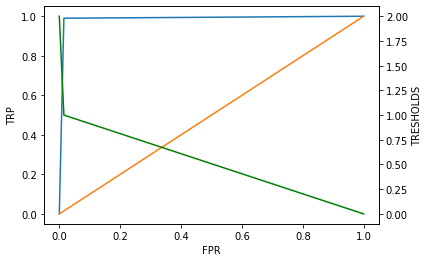

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

dtc=DecisionTreeClassifier(random_state=3)
dtc.fit(X_train_1,y_train_1)
y_train_1_pred=dtc.predict(X_train_1)
y_train_1_prob=dtc.predict_proba(X_train_1)[:,1]
y_test_1_pred=dtc.predict(X_test_1)
y_test_1_prob=dtc.predict_proba(X_test_1)[:,1]

print('Confusion Matrix - Train : ','\n', confusion_matrix(y_train_1,y_train_1_pred))
print('Accuracy Score - Train : ',accuracy_score(y_train_1,y_train_1_pred))
print('Classification Report - Train : ',classification_report(y_train_1,y_train_1_pred))
print('AUC Score - Train : ', roc_auc_score(y_train_1,y_train_1_prob))
print('\n'*2)
print('Confusion Matrix - Test : ', confusion_matrix(y_test_1,y_test_1_pred))
print('Accuracy Score - Test : ',accuracy_score(y_test_1,y_test_1_pred))
print('Classification Report - Test : ',classification_report(y_test_1,y_test_1_pred))
print('AUC Score - Test : ', roc_auc_score(y_test_1,y_test_1_prob))
print('\n')
fpr,tpr,thresholds= roc_curve(y_test_1,y_test_1_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

Confusion Matrix - Train :  
 [[23567     0]
 [    1 23584]]
Accuracy Score - Train :  0.9999787919918561
Classification Report - Train :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     23567
           1       1.00      1.00      1.00     23585

    accuracy                           1.00     47152
   macro avg       1.00      1.00      1.00     47152
weighted avg       1.00      1.00      1.00     47152

AUC Score - Train :  1.0



Confusion Matrix - Test :  [[5899    4]
 [ 138 5747]]
Accuracy Score - Test :  0.9879538513742789
Classification Report - Test :                precision    recall  f1-score   support

           0       0.98      1.00      0.99      5903
           1       1.00      0.98      0.99      5885

    accuracy                           0.99     11788
   macro avg       0.99      0.99      0.99     11788
weighted avg       0.99      0.99      0.99     11788

AUC Score - Test :  0.9973632922274591




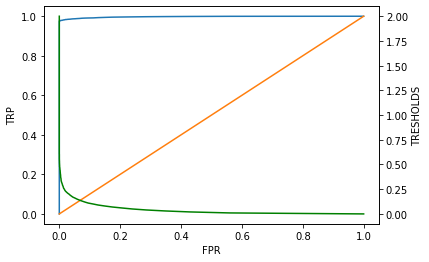

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

rfr=RandomForestClassifier(random_state=3)
rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)
y_train_prob=rfr.predict_proba(X_train)[:,1]
y_test_pred=rfr.predict(X_test)
y_test_prob=rfr.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train : ','\n', confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train : ',accuracy_score(y_train,y_train_pred))
print('Classification Report - Train : ',classification_report(y_train,y_train_pred))
print('AUC Score - Train : ', roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix - Test : ', confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test : ',accuracy_score(y_test,y_test_pred))
print('Classification Report - Test : ',classification_report(y_test,y_test_pred))
print('AUC Score - Test : ', roc_auc_score(y_test,y_test_prob))
print('\n')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()

Confusion Matrix - Train :  
 [[10493     0]
 [    0 10542]]
Accuracy Score - Train :  1.0
Classification Report - Train :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     10493
           1       1.00      1.00      1.00     10542

    accuracy                           1.00     21035
   macro avg       1.00      1.00      1.00     21035
weighted avg       1.00      1.00      1.00     21035

AUC Score - Train :  1.0



Confusion Matrix - Test :  [[2649    5]
 [  21 2584]]
Accuracy Score - Test :  0.9950560943145085
Classification Report - Test :                precision    recall  f1-score   support

           0       0.99      1.00      1.00      2654
           1       1.00      0.99      0.99      2605

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

AUC Score - Test :  0.9996833808961088




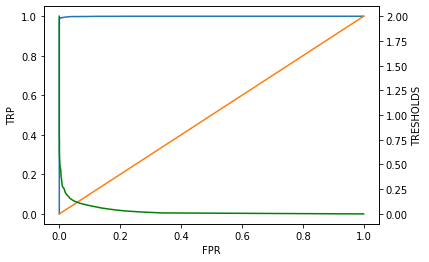

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier

rfr=RandomForestClassifier(random_state=3)
rfr.fit(X_train_1,y_train_1)
y_train_1_pred=rfr.predict(X_train_1)
y_train_1_prob=rfr.predict_proba(X_train_1)[:,1]
y_test_1_pred=rfr.predict(X_test_1)
y_test_1_prob=rfr.predict_proba(X_test_1)[:,1]

print('Confusion Matrix - Train : ','\n', confusion_matrix(y_train_1,y_train_1_pred))
print('Accuracy Score - Train : ',accuracy_score(y_train_1,y_train_1_pred))
print('Classification Report - Train : ',classification_report(y_train_1,y_train_1_pred))
print('AUC Score - Train : ', roc_auc_score(y_train_1,y_train_1_prob))
print('\n'*2)
print('Confusion Matrix - Test : ', confusion_matrix(y_test_1,y_test_1_pred))
print('Accuracy Score - Test : ',accuracy_score(y_test_1,y_test_1_pred))
print('Classification Report - Test : ',classification_report(y_test_1,y_test_1_pred))
print('AUC Score - Test : ', roc_auc_score(y_test_1,y_test_1_prob))
print('\n')
fpr,tpr,thresholds= roc_curve(y_test_1,y_test_1_prob)
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr)
ax1.plot(fpr,fpr)
ax1.set_xlabel('FPR')
ax1.set_ylabel('TRP')
ax2=ax1.twinx()
ax2.plot(fpr,thresholds,'-g')
ax2.set_ylabel('TRESHOLDS')
plt.show()
plt.show()